<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.7/546.7 kB 10.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2024-12-31 10:00:27
-------------------
qualified stocks: 88
with latest results: 84
still star stocks: 42
-------------------
Initial Investment:  1.03 C
CY Investment:  1.16 C
Reserve:  3.10 K
Current:  1.17 C
-------------------
Today PnL: -55.56 K (-0.47%)
Current PnL: -9.78 L (-8.42%)
CY Booked + Current PnL: 87.61 K (0.75%)
-------------------
Total profit:  5.25 L
Total loss:  -15.04 L
-------------------
Total Booked + Current PnL: 13.99 L (13.58%)
Total Booked PnL: 23.77 L (23.07%)
Curr Year Booked PnL: 10.66 L (9.09%)
Prev Year Booked PnL: 13.11 L (12.73%)
Est FTT:  1.89 C
Est FTT PnL: 72.01 L (61.41%)
-------------------
Est LTT:  2.47 C
Est LTT PnL: 1.30 C (110.72%)
Deployed:  1.03 C
Current:  1.17 C
CAGR/XIRR %: 11.35%


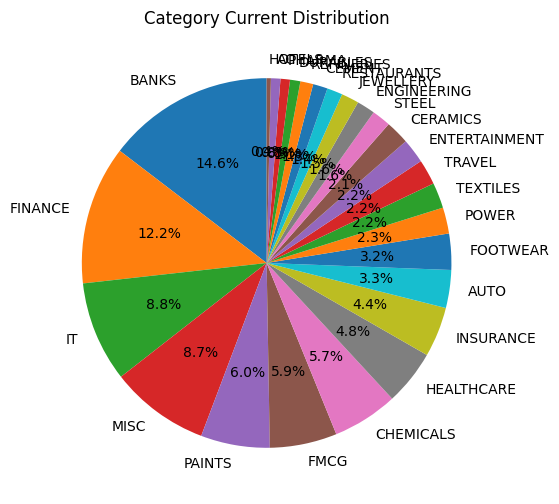

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'Close', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,Close,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
29,GLAND,1798.00,2114.00,5.94,H,90.34,97092.0,18039.0,17069.0,0.76,22.82,17.58,44.40,29.0,1.06,0.83,11.97,XR,NTT,PHARMA
47,LALPATHLAB,2948.15,3450.00,-14.64,H,71.59,106133.0,15417.0,18064.0,-0.23,16.99,17.02,36.91,19.0,0.85,0.91,47.47,X40N,NTT,HEALTHCARE
12,BANKBARODA,240.45,288.89,-23.74,M,70.45,94978.0,17661.0,19138.0,-0.23,22.84,20.15,47.59,19.0,0.92,0.81,11.13,XR,ATH,BANKS
87,VIPIND,475.80,575.00,-315.04,H,28.98,92781.0,-2535.0,19345.0,-1.47,-2.66,20.85,17.64,-7.0,-0.13,0.79,10.11,X40N,NTT,MISC
20,CLEAN,1423.05,1683.00,-7.86,M,98.86,116690.0,2731.0,21319.0,2.00,2.40,18.27,21.10,2.0,0.13,1.00,11.54,XR,NTT,CHEMICALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SAIL,112.00,228.00,50.74,L,38.64,192864.0,-32098.0,199749.0,0.24,-14.27,103.57,74.53,6.0,-0.16,1.65,4.56,XY24,BTT,STEEL
58,RBLBANK,156.23,388.00,-42.40,M,82.95,158730.0,-75570.0,235476.0,-0.38,-32.25,148.35,68.25,-50.0,-0.32,1.35,2.70,XY24,NTT,BANKS
11,BANDHANBNK,158.18,400.00,-43.76,M,30.68,173523.0,-65118.0,265282.0,-0.52,-27.29,152.88,83.87,-25.0,-0.25,1.48,0.00,XY24,NTT,BANKS
75,TANLA,664.30,2007.31,-41.09,M,36.36,146810.0,-72325.0,296806.0,-0.61,-33.00,202.17,102.44,-32.0,-0.24,1.25,0.00,AR,ATH,IT


In [5]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Close,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
29,GLAND,1798.00,2114.00,5.94,H,90.34,97092.0,18039.0,17069.0,0.76,22.82,17.58,44.40,29.0,1.06,0.83,11.97,XR,NTT,PHARMA
47,LALPATHLAB,2948.15,3450.00,-14.64,H,71.59,106133.0,15417.0,18064.0,-0.23,16.99,17.02,36.91,19.0,0.85,0.91,47.47,X40N,NTT,HEALTHCARE
12,BANKBARODA,240.45,288.89,-23.74,M,70.45,94978.0,17661.0,19138.0,-0.23,22.84,20.15,47.59,19.0,0.92,0.81,11.13,XR,ATH,BANKS
87,VIPIND,475.80,575.00,-315.04,H,28.98,92781.0,-2535.0,19345.0,-1.47,-2.66,20.85,17.64,-7.0,-0.13,0.79,10.11,X40N,NTT,MISC
15,BAYERCROP,5454.55,6836.59,17.60,H,25.57,87273.0,17728.0,22115.0,-0.42,25.49,25.34,57.29,21.0,0.80,0.74,11.73,X40N,ATH,CHEMICALS
70,SIS,363.20,528.00,71.40,M,65.91,61744.0,-19346.0,28013.0,0.29,-23.86,45.37,10.69,-21.0,-0.69,0.53,0.29,X40N,NTT,MISC
76,TATAELXSI,6925.55,9000.00,-11.28,H,90.34,96958.0,-5694.0,29039.0,0.57,-5.55,29.95,22.74,-5.0,-0.20,0.83,8.64,X40N,NTT,IT
19,CERA,7442.60,10420.45,-3.80,H,87.50,74426.0,-16173.0,29778.0,-3.15,-17.85,40.01,15.02,-51.0,-0.54,0.63,13.00,X40N,ATH,CERAMICS
81,TRIDENT,32.73,48.00,67.15,M,60.23,80843.0,-11412.0,37713.0,-0.43,-12.37,46.65,28.51,-11.0,-0.30,0.69,4.70,XR,NTT,TEXTILES
51,MASFIN,270.30,401.09,-26.87,M,75.00,81090.0,-16890.0,39239.0,0.78,-17.24,48.39,22.81,-74.0,-0.43,0.69,2.97,XR,ATH,FINANCE


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XY24') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Close,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
42,JIOFIN,298.55,387.0,-10.43,M,14.20,147484.0,-10715.0,43700.0,-2.51,-6.77,29.63,20.85,65.0,-0.25,1.26,27.31,XY24,BTT,FINANCE
18,CAMPUS,310.20,393.0,0.80,M,95.45,176504.0,8729.0,47109.0,-2.82,5.20,26.69,33.28,18.0,0.19,1.51,44.62,XY24,NTT,FOOTWEAR
84,UNIONBANK,119.19,163.0,-11.68,L,81.82,135519.0,-5321.0,49817.0,0.22,-3.78,36.76,31.59,-20.0,-0.11,1.16,10.12,XY24,NTT,BANKS
23,DABUR,505.60,735.0,-10.09,H,61.36,128928.0,-3254.0,58495.0,0.07,-2.46,45.37,41.79,-3.0,-0.06,1.10,3.07,XY24,BTT,FMCG
52,MEDANTA,1086.45,1486.0,-2.43,M,77.27,165140.0,9705.0,60738.0,0.75,6.24,36.78,45.32,30.0,0.16,1.41,15.02,XY24,NTT,HEALTHCARE
54,NHPC,78.83,115.0,181.32,M,63.64,135430.0,-5583.0,62135.0,-1.15,-3.96,45.88,40.11,-85.0,-0.09,1.16,21.61,XY24,NTT,POWER
28,GICRE,439.55,583.0,11.46,M,97.73,192083.0,45662.0,62696.0,-1.18,31.19,32.64,74.00,137.0,0.73,1.64,48.48,XY24,BTT,INSURANCE
7,ATULAUTO,569.80,844.0,-13.93,L,51.14,134473.0,-12895.0,64708.0,0.45,-8.75,48.12,35.16,-37.0,-0.20,1.15,19.78,XY24,NTT,AUTO
80,TITAGARH,1150.55,1548.0,4.22,M,56.82,187540.0,5394.0,64776.0,4.42,2.96,34.54,38.53,14.0,0.08,1.60,39.73,XY24,NTT,ENGINEERING
43,JPPOWER,17.48,26.2,-63.68,L,39.77,132376.0,-9466.0,66042.0,-0.63,-6.67,49.89,39.88,85.0,-0.14,1.13,18.51,XY24,NTT,POWER


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Close,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
29,GLAND,1798.00,2114.00,5.94,H,90.34,97092.0,18039.0,17069.0,0.76,22.82,17.58,44.40,29.0,1.06,0.83,11.97,XR,NTT,PHARMA
12,BANKBARODA,240.45,288.89,-23.74,M,70.45,94978.0,17661.0,19138.0,-0.23,22.84,20.15,47.59,19.0,0.92,0.81,11.13,XR,ATH,BANKS
20,CLEAN,1423.05,1683.00,-7.86,M,98.86,116690.0,2731.0,21319.0,2.00,2.40,18.27,21.10,2.0,0.13,1.00,11.54,XR,NTT,CHEMICALS
44,JUBLFOOD,711.00,850.00,-0.31,M,96.59,159264.0,50098.0,31136.0,-1.08,45.89,19.55,74.41,28.0,1.61,1.36,65.31,AR,NTT,RESTAURANTS
81,TRIDENT,32.73,48.00,67.15,M,60.23,80843.0,-11412.0,37713.0,-0.43,-12.37,46.65,28.51,-11.0,-0.30,0.69,4.70,XR,NTT,TEXTILES
51,MASFIN,270.30,401.09,-26.87,M,75.00,81090.0,-16890.0,39239.0,0.78,-17.24,48.39,22.81,-74.0,-0.43,0.69,2.97,XR,ATH,FINANCE
48,LAOPALA,316.10,464.00,-16.11,M,28.98,86295.0,-14551.0,40377.0,-0.72,-14.43,46.79,25.61,-41.0,-0.36,0.74,7.54,AR,NTT,CERAMICS
36,IEX,178.54,219.00,-3.27,M,84.09,199786.0,50523.0,45272.0,-0.17,33.85,22.66,64.18,28.0,1.12,1.70,35.45,XR,NTT,MISC
38,INDUSINDBK,954.85,1800.00,-35.98,M,55.68,54426.0,-22780.0,48172.0,-0.90,-29.51,88.51,32.89,-21.0,-0.47,0.46,2.73,XR,NTT,BANKS
17,BSOFT,564.00,844.81,-1.98,M,42.05,98700.0,-11349.0,49143.0,-1.82,-10.31,49.79,34.34,-22.0,-0.23,0.84,3.41,XR,ATH,IT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.70
1,20,34.50
2,30,47.84


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.06
X40,20.07
X40N,14.94
XR,14.51
AR,6.56
SR,1.44
X200,1.42


In [10]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.60,-11.41,64.29
FINANCE,12.15,-14.68,62.98
IT,8.79,-8.00,62.28
MISC,8.69,0.42,33.68
PAINTS,6.03,-16.33,50.75
FMCG,5.87,-6.37,47.82
CHEMICALS,5.73,-7.85,70.43
HEALTHCARE,4.83,7.89,38.69
INSURANCE,4.38,5.71,45.16


In [11]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2847303.0
XR,1742930.0
X40N,893844.0
X40,855210.0
AR,634189.0
SR,176854.0
X200,51112.0


In [12]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M,4065616.0
L,1623840.0
H,1511986.0


In [13]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Conviction', 'Criteria'])['FTT Amt'].sum().sort_values(ascending=False)

Conviction  Criteria
M           XY24        1910771.0
            XR           909330.0
L           XR           816531.0
H           X40          796036.0
L           XY24         638083.0
M           AR           520893.0
            X40N         488594.0
H           XY24         298449.0
            X40N         290646.0
M           SR           176854.0
L           X40N         114604.0
M           X40           59174.0
H           AR            58674.0
L           AR            54622.0
H           X200          51112.0
            XR            17069.0
Name: FTT Amt, dtype: float64

In [14]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M,49
H,27
L,12
